## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
data_path = '../data/'
df = pd.read_csv(data_path + 'train.csv')



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [29]:
print(sum(df['log_price'].isnull()))
print(sum(df['review_scores_rating'].isnull()))

# 排除 review_scores_rating 是NA的

df.dropna(subset=['review_scores_rating'],inplace=True)

0
16722


In [58]:
X = df[['log_price']]
x_train, x_test, y_train, y_test = train_test_split(X, df['review_scores_rating'], test_size=0.1, random_state=4)

In [59]:

reg = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)


In [60]:
# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [1.06484184]
Mean squared error: 50.85


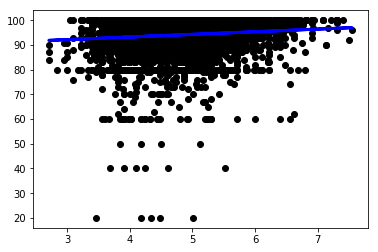

In [61]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

這是airbnb的資料，我用log_price去預測評價，看起來單用價格是不太能做出好的預測。